In [1]:
import pandas as pd
from sklearn.datasets import load_iris
iris = load_iris()

In [2]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [3]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [4]:
df = pd.DataFrame(iris.data,columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [5]:
df['target'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [8]:
df['flower_name'] =df.target.apply(lambda x: iris.target_names[x])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [9]:
from sklearn.model_selection import train_test_split

In [13]:
inputs = df.drop(['target','flower_name'],axis='columns')
outputs = df.flower_name

In [34]:
inputs.head(100)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
95,5.7,3.0,4.2,1.2
96,5.7,2.9,4.2,1.3
97,6.2,2.9,4.3,1.3
98,5.1,2.5,3.0,1.1


In [15]:
outputs.head()

0    setosa
1    setosa
2    setosa
3    setosa
4    setosa
Name: flower_name, dtype: object

In [35]:
inputs_train,inputs_test,outputs_train,outputs_test = train_test_split(inputs,outputs,test_size=0.3)

## Random Forest

In [49]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=15)

model.fit(inputs_train,outputs_train)

RandomForestClassifier(n_estimators=15)

In [50]:
model.score(inputs_test,outputs_test)

0.9555555555555556

In [51]:
outputs_predicts = model.predict(inputs_test)
outputs_predicts

array(['virginica', 'virginica', 'virginica', 'versicolor', 'virginica',
       'virginica', 'setosa', 'virginica', 'virginica', 'virginica',
       'virginica', 'versicolor', 'versicolor', 'setosa', 'setosa',
       'setosa', 'virginica', 'setosa', 'versicolor', 'versicolor',
       'setosa', 'versicolor', 'setosa', 'versicolor', 'versicolor',
       'versicolor', 'virginica', 'versicolor', 'virginica', 'setosa',
       'virginica', 'versicolor', 'virginica', 'versicolor', 'versicolor',
       'versicolor', 'virginica', 'setosa', 'setosa', 'virginica',
       'versicolor', 'versicolor', 'setosa', 'virginica', 'virginica'],
      dtype=object)

## Confusion Matrix

In [52]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(outputs_test,outputs_predicts)
cm

array([[11,  0,  0],
       [ 0, 14,  0],
       [ 0,  2, 18]], dtype=int64)

Text(69.0, 0.5, 'truth')

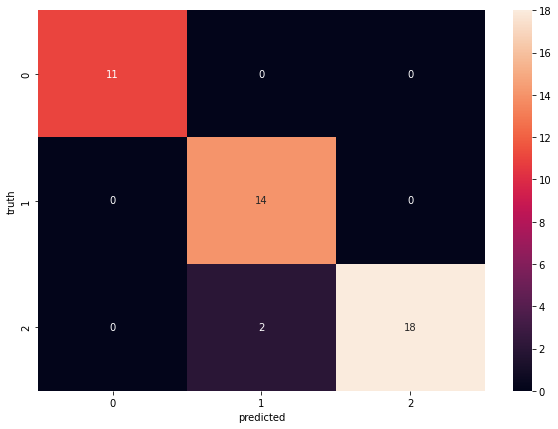

In [55]:
%matplotlib inline
import matplotlib.pyplot as plt

import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True)

plt.xlabel('predicted')
plt.ylabel('truth')